In [432]:
#Need package.
import pandas as pd
import numpy as np
import sys
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Take the CSV in 

In [433]:
#resources:
#https://liquipedia.net/leagueoflegends/World_Championship/2018/Group_Stage/Statistics
#https://lol.gamepedia.com/2018_Season_World_Championship/Main_Event/Champion_Statistics
lol = pd.read_excel('LOLworld.xlsx')
seclol = pd.read_excel('secLOLworld.xlsx')

In [434]:
#Helper functions:
def Ratio_cols(words, size):
    return [word for word in words if len(word) == size and word.startswith("WR")]

In [435]:
#Cleaning data since I get it from the website
for i in range (len(lol)):
    str_length = len(lol['Champion'][i].split())
    if str_length <= 3: 
        lol['Champion'][i] = lol['Champion'][i].split()[0]
    else:
        strsplt = lol['Champion'][i].split()
        lol['Champion'][i] = strsplt[0] + " " + strsplt[1]
        
colname = Ratio_cols(list(lol),3)
#print(colname)

#Get rid of %
#for name in colname:
#    print( type(lol[name]) )
#    lol[name] = lol[name].apply(lambda x: x.strip('%'))
#Change to percentage
lol[colname] = lol[colname].apply(pd.to_numeric)
#for name in colname:
#    lol[name] = lol[name]*100
lol.head()

,Number,Champion,ST,WT,LT,WRT,SB,WB,LB,WRB,...,WR3,35-40,WLRatio4,WR4,40-45,WLRatio5,WR5,>45,WLRatio6,WR6
0,1,Aatrox,17,10,7,0.59,9,4,5,0.44,...,0.75,2,1-1,0.5,2,1-1,0.50,1,1-0,1
1,2,Akali,9,6,3,0.67,7,6,1,0.86,...,0.67,2,2-0,1.0,3,1-2,0.33,1,1-0,1
2,3,Alistar,16,10,6,0.63,11,5,6,0.45,...,0.75,2,1-1,0.5,2,2-0,1.00,1,1-0,1
3,4,Ashe,1,0,1,0.00,1,0,1,0.00,...,0.00,0,0-0,0.0,1,0-1,0.00,0,0-0,0
4,5,Azir,3,1,2,0.33,0,0,0,0.00,...,0.00,0,0-0,0.0,0,0-0,0.00,0,0-0,0


In [436]:
#Cleaning up seclol
for i in range (len(seclol)):
    str_length = len(seclol['Champion'][i].split())
    if str_length <= 2: 
        seclol['Champion'][i] = seclol['Champion'][i].split()[1]
    else:
        strsplt = seclol['Champion'][i].split()
        seclol['Champion'][i] = strsplt[-2] + " " + strsplt[-1]
seclol.head()

,Champion,B,G,W,L,WR,PB%,By,K,D,A,KDA,CS,CSPM,G.1,GPM,KPAR,KS,GS
0,Aatrox,34,17,10,7,58.8,100.0,14,2.24,2.12,4.94,3.39,291.59,9.01,12.72k,393,0.57,0.178,0.218
1,Akali,27,9,6,3,66.7,70.6,6,4.78,2.56,4.78,3.74,331.56,8.65,14.98k,391,0.652,0.326,0.22
2,Alistar,34,16,10,6,62.5,98.0,11,0.69,1.88,6.56,3.87,50,1.53,7.68k,234,0.734,0.07,0.132
3,Ashe,0,1,0,1,0,2.0,1,2,2,8,5,440,10,17.8k,405,0.556,0.111,0.238
4,Azir,0,3,1,2,33.3,5.9,2,2,1,5,7,303,9.96,12.23k,402,0.84,0.24,0.241


In [437]:
#Top win rate total WRT:
topwrt = lol.sort_values(by = ['WRT','ST'], ascending = False)
topwrt = topwrt.loc[(topwrt['ST'] > 2)]
topwrt = topwrt.loc[(topwrt['WRT'] > 0.5)][:10]
topwrt = topwrt.reset_index(drop=True)
topwrt

,Number,Champion,ST,WT,LT,WRT,SB,WB,LB,WRB,...,WR3,35-40,WLRatio4,WR4,40-45,WLRatio5,WR5,>45,WLRatio6,WR6
0,44,Ornn,10,8,2,0.80,3,2,1,0.67,...,0.50,1,1-0,1.00,2,2-0,1.00,1,1-0,1
1,33,Leona,8,6,2,0.75,4,3,1,0.75,...,1.00,1,0-1,0.00,1,1-0,1.00,0,0-0,0
2,51,Sivir,10,7,3,0.70,7,4,3,0.57,...,0.67,2,2-0,1.00,2,1-1,0.50,1,1-0,1
3,42,Nocturne,18,12,6,0.67,9,6,3,0.67,...,0.63,4,3-1,0.75,1,1-0,1.00,1,1-0,1
4,48,Shen,12,8,4,0.67,8,6,2,0.75,...,0.67,3,3-0,1.00,2,1-1,0.50,0,0-0,0
5,64,Xin Zhao,12,8,4,0.67,7,6,1,0.86,...,0.50,3,2-1,0.67,0,0-0,0.00,0,0-0,0
6,2,Akali,9,6,3,0.67,7,6,1,0.86,...,0.67,2,2-0,1.00,3,1-2,0.33,1,1-0,1
7,53,Swain,6,4,2,0.67,3,2,1,0.67,...,1.00,1,0-1,0.00,0,0-0,0.00,0,0-0,0
8,3,Alistar,16,10,6,0.63,11,5,6,0.45,...,0.75,2,1-1,0.50,2,2-0,1.00,1,1-0,1
9,56,Taliyah,13,8,5,0.62,6,3,3,0.50,...,0.50,2,0-2,0.00,1,1-0,1.00,1,1-0,1


In [474]:
top10 = seclol[seclol['Champion'].str.contains("Ornn|Leona|Sivir|Nocturne|Shen|Xin Zhao|Akali|Swain|Alistar|Taliyah")]
top10 = top10.reset_index(drop=True)
top10.sort_values(by = 'G', ascending = False)

,Champion,B,G,W,L,WR,PB%,By,K,D,A,KDA,CS,CSPM,G.1,GPM,KPAR,KS,GS
3,Nocturne,14,18,12,6,66.7,62.7,12,1.94,2.5,4.94,2.76,174.06,5.08,10.94k,320,0.608,0.172,0.179
1,Alistar,34,16,10,6,62.5,98.0,11,0.69,1.88,6.56,3.87,50,1.53,7.68k,234,0.734,0.07,0.132
8,Taliyah,19,13,8,5,61.5,62.7,9,3.46,1.69,5.77,5.45,181.38,5.59,11.36k,350,0.784,0.294,0.198
5,Shen,9,12,8,4,66.7,41.2,9,1.67,1.67,6.67,5,168.92,5.21,10.51k,324,0.654,0.131,0.178
9,Xin Zhao,12,12,8,4,66.7,47.1,9,3,2.08,6.25,4.44,151.5,4.9,10.58k,342,0.669,0.217,0.188
4,Ornn,10,10,8,2,80,39.2,8,1.5,1.8,7.2,4.83,263.8,7.74,12.21k,358,0.58,0.1,0.192
6,Sivir,4,10,7,3,70,27.5,7,3.8,1.7,7.3,6.53,383.8,10.91,16.23k,461,0.735,0.252,0.256
0,Akali,27,9,6,3,66.7,70.6,6,4.78,2.56,4.78,3.74,331.56,8.65,14.98k,391,0.652,0.326,0.22
2,Leona,1,8,6,2,75,17.6,6,1.13,2.75,9.13,3.73,58,1.8,8.15k,253,0.683,0.075,0.136
7,Swain,4,6,4,2,66.7,19.6,4,4.67,1.5,4.33,6,268,9.19,12.48k,428,0.692,0.359,0.228


In [457]:
#Scaling plot
setcolwl = ['WLRatio1', 'WLRatio2', 'WLRatio3', 'WLRatio4', 'WLRatio5', 'WLRatio6']
setcol_namewl = ['Champion'] + ['ST'] + ['WT'] + setcolwl 
winlosetop = topwrt.loc[:, setcol_namewl]

In [464]:
setcolwlr = ['WLRatio1', 'WLRatio2', 'WLRatio3', 'WLRatio4', 'WLRatio5', 'WLRatio6']
r0 = np.zeros((20,6))

j = 0
i = 0
z = 0

for j in range(0,20,2):
    #print("Start second for loop")
    for name in setcolwlr:
        #print(j,z, i)
        r0[j][z]   += int(topwrt[name][i].split('-')[0])
        #print(j+1,z, i)
        r0[j+1][z] += int(topwrt[name][i].split('-')[1])
        z += 1
    z = 0
    i += 1

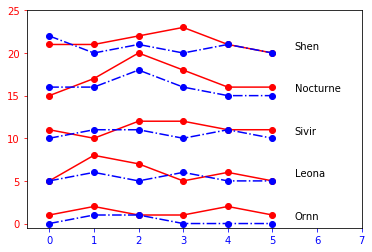

In [460]:
fig = plt.figure()
ax = plt.axes()
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
plt.xlim((-0.5,7))
plt.ylim((-0.5,25))
k = 0
for i in range(0,10,2):
    plt.plot(r0[i] + k, '-ro')
    plt.plot(r0[i+1] + k, '-.bo')
    k += 5
plt.text(5.5, 0.5, topwrt['Champion'][0])
plt.text(5.5, 5.5, topwrt['Champion'][1])
plt.text(5.5, 10.5, topwrt['Champion'][2])
plt.text(5.5, 15.5, topwrt['Champion'][3])
plt.text(5.5, 20.5, topwrt['Champion'][4])
plt.show()

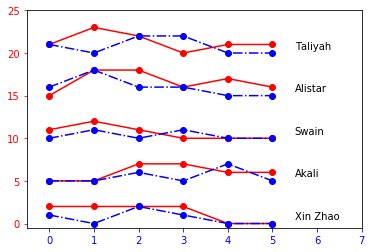

In [470]:
fig = plt.figure()
ax = plt.axes()
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
plt.xlim((-0.5,7))
plt.ylim((-0.5,25))
k = 0
for i in range(10,20,2):
    plt.plot(r0[i] + k, '-ro')
    plt.plot(r0[i+1] + k, '-.bo')
    k += 5
plt.text(5.5, 0.5, topwrt['Champion'][5])
plt.text(5.5, 5.5, topwrt['Champion'][6])
plt.text(5.5, 10.5, topwrt['Champion'][7])
plt.text(5.5, 15.5, topwrt['Champion'][8])
plt.text(5.5, 20.5, topwrt['Champion'][9])
plt.show()

In [441]:
#Top low win rate
botwrt = lol.sort_values(by = ['WRT','ST'])
botnew = botwrt.loc[(botwrt['WRT'] < 0.5)]
botwrt = botnew.loc[botwrt['WRT'] >0][:10]
botwrt = botwrt.reset_index(drop=True)
botwrt

,Number,Champion,ST,WT,LT,WRT,SB,WB,LB,WRB,...,WR3,35-40,WLRatio4,WR4,40-45,WLRatio5,WR5,>45,WLRatio6,WR6
0,45,Poppy,5,1,4,0.20,1,0,1,0.00,...,0.00,2,0-2,0.00,0,0-0,0.00,1,0-1,0
1,30,Kindred,4,1,3,0.25,1,1,0,1.00,...,1.00,1,0-1,0.00,0,0-0,0.00,0,0-0,0
2,34,Lissandra,12,3,9,0.25,5,2,3,0.40,...,0.00,1,0-1,0.00,1,0-1,0.00,0,0-0,0
3,5,Azir,3,1,2,0.33,0,0,0,0.00,...,0.00,0,0-0,0.00,0,0-0,0.00,0,0-0,0
4,11,Cho'Gath,3,1,2,0.33,1,1,0,1.00,...,0.50,0,0-0,0.00,1,0-1,0.00,0,0-0,0
5,55,Tahm Kench,11,4,7,0.36,7,3,4,0.43,...,0.67,1,0-1,0.00,3,0-3,0.00,0,0-0,0
6,50,Sion,23,9,14,0.39,10,5,5,0.50,...,0.33,5,1-4,0.20,3,2-1,0.67,0,0-0,0
7,15,Ezreal,5,2,3,0.40,3,2,1,0.67,...,0.00,2,1-1,0.50,1,0-1,0.00,0,0-0,0
8,43,Olaf,15,6,9,0.40,7,3,4,0.43,...,0.33,2,1-1,0.50,3,1-2,0.33,1,0-1,0
9,19,Gragas,22,9,13,0.41,7,2,5,0.29,...,0.25,3,2-1,0.67,5,2-3,0.40,1,0-1,0


In [442]:
#Scaling plot
setcolwl = ['WLRatio1', 'WLRatio2', 'WLRatio3', 'WLRatio4', 'WLRatio5', 'WLRatio6']
setcol_namewl = ['Champion'] + ['ST'] + ['WT'] + setcolwl 
winlosebot = botwrt.loc[:, setcol_namewl]
winlosebot

,Champion,ST,WT,WLRatio1,WLRatio2,WLRatio3,WLRatio4,WLRatio5,WLRatio6
0,Poppy,5,1,1-0,0-0,0-1,0-2,0-0,0-1
1,Kindred,4,1,0-0,0-2,1-0,0-1,0-0,0-0
2,Lissandra,12,3,2-1,1-2,0-4,0-1,0-1,0-0
3,Azir,3,1,0-0,1-1,0-1,0-0,0-0,0-0
4,Cho'Gath,3,1,0-0,0-0,1-1,0-0,0-1,0-0
5,Tahm Kench,11,4,0-0,2-2,2-1,0-1,0-3,0-0
6,Sion,23,9,2-1,2-4,2-4,1-4,2-1,0-0
7,Ezreal,5,2,1-0,0-1,0-0,1-1,0-1,0-0
8,Olaf,15,6,1-0,2-3,1-2,1-1,1-2,0-1
9,Gragas,22,9,0-1,3-1,2-6,2-1,2-3,0-1


In [443]:
setcolwlr = ['WLRatio1', 'WLRatio2', 'WLRatio3', 'WLRatio4', 'WLRatio5', 'WLRatio6']
r1 = np.zeros((20,6))

j1 = 0
i1 = 0
z1 = 0

for j1 in range(0,20,2):
    #print("Start second for loop")
    for name in setcolwlr:
        #print(j,z, i)
        r1[j1][z1]   += int(botwrt[name][i1].split('-')[0])
        #print(j+1,z, i)
        r1[j1+1][z1] += int(botwrt[name][i1].split('-')[1])
        z1 += 1
    z1 = 0
    i1 += 1

r1

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 2., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 2., 0., 1., 0., 0.],
       [2., 1., 0., 0., 0., 0.],
       [1., 2., 4., 1., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0., 2., 2., 0., 0., 0.],
       [0., 2., 1., 1., 3., 0.],
       [2., 2., 2., 1., 2., 0.],
       [1., 4., 4., 4., 1., 0.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 1., 0.],
       [1., 2., 1., 1., 1., 0.],
       [0., 3., 2., 1., 2., 1.],
       [0., 3., 2., 2., 2., 0.],
       [1., 1., 6., 1., 3., 1.]])

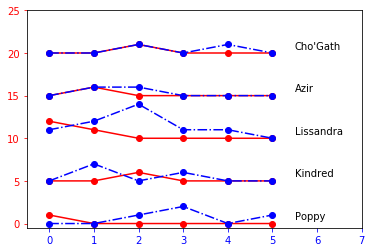

In [444]:
fig = plt.figure()
ax = plt.axes()
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
plt.xlim((-0.5,7))
plt.ylim((-0.5,25))
k = 0
for i in range(0,10,2):
    plt.plot(r1[i] + k, '-ro')
    plt.plot(r1[i+1] + k, '-.bo')
    k += 5
plt.text(5.5, 0.5, botwrt['Champion'][0])
plt.text(5.5, 5.5, botwrt['Champion'][1])
plt.text(5.5, 10.5, botwrt['Champion'][2])
plt.text(5.5, 15.5, botwrt['Champion'][3])
plt.text(5.5, 20.5, botwrt['Champion'][4])
plt.show()

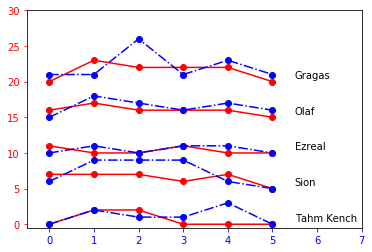

In [471]:
fig = plt.figure()
ax = plt.axes()
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
plt.xlim((-0.5,7))
plt.ylim((-0.5,30))
k = 0
for i in range(10,20,2):
    plt.plot(r1[i] + k, '-ro')
    plt.plot(r1[i+1] + k, '-.bo')
    k += 5
plt.text(5.5, 0.5, botwrt['Champion'][5])
plt.text(5.5, 5.5, botwrt['Champion'][6])
plt.text(5.5, 10.5, botwrt['Champion'][7])
plt.text(5.5, 15.5, botwrt['Champion'][8])
plt.text(5.5, 20.5, botwrt['Champion'][9])
plt.show()

In [485]:
#Most played champion:
setcolwl = ['WLRatio1', 'WLRatio2', 'WLRatio3', 'WLRatio4', 'WLRatio5', 'WLRatio6']
choose = ['Champion','ST', 'WT', 'LT', 'SB', 'WB', 'LB','SR', 'WR', 'LR']
mostplayed = lol[lol['Champion'].str.contains("Kai'Sa|Xayah|Sion|Gragas|Urgot|Rakan|Nocturne|Thresh|Aatrox|Alistar|Irelia|Galio|Syndra|Taliyah|Lissandra|Tahm Kench|Camille|Akali|LeBlanc")]
mostplayed= mostplayed.loc[:, choose + setcolwl]
mostplayed = mostplayed.sort_values(by = ['ST'], ascending = False)
mostplayed = mostplayed.reset_index(drop=True)
mostplayed

,Champion,ST,WT,LT,SB,WB,LB,SR,WR,LR,WLRatio1,WLRatio2,WLRatio3,WLRatio4,WLRatio5,WLRatio6
0,Kai'Sa,31,16,15,11,5,6,20,11,9,2-1,6-5,1-7,2-2,4-0,1-0
1,Xayah,25,11,14,14,8,6,11,3,8,0-2,2-3,6-1,2-5,1-1,0-2
2,Sion,23,9,14,10,5,5,13,4,9,2-1,2-4,2-4,1-4,2-1,0-0
3,Gragas,22,9,13,7,2,5,15,7,8,0-1,3-1,2-6,2-1,2-3,0-1
4,Urgot,20,10,10,14,7,7,6,3,3,0-1,4-2,3-5,2-1,1-1,0-0
5,Rakan,20,9,11,8,4,4,12,5,7,1-1,2-5,1-3,5-1,0-1,0-0
6,Nocturne,18,12,6,9,6,3,9,6,3,0-1,2-1,5-3,3-1,1-0,1-0
7,Thresh,17,8,9,11,6,5,6,2,4,2-1,0-2,4-2,1-3,1-0,0-1
8,Aatrox,17,10,7,9,4,5,8,6,2,2-0,2-4,3-1,1-1,1-1,1-0
9,Alistar,16,10,6,11,5,6,5,5,0,0-1,3-3,3-1,1-1,2-0,1-0


In [483]:
#Total games = 51
#G.1 = Gold in total per game
#by = Played by
mp = ['Champion','PB%', 'G', 'WR', 'KDA', 'KPAR']
secmostplayed = seclol[seclol['PB%']> 50][:20]
secmostplayed = secmostplayed.sort_values(by = ['G'], ascending = False)
secmostplayed = secmostplayed.loc[:, mp]
secmostplayed = secmostplayed.reset_index(drop=True)
secmostplayed

,Champion,PB%,G,WR,KDA,KPAR
0,Kai'Sa,86.3,31,51.6,4,0.737
1,Xayah,82.4,25,44,4.36,0.651
2,Sion,72.5,23,39.1,3,0.585
3,Gragas,56.9,22,40.9,2.61,0.68
4,Urgot,96.1,20,50,2.71,0.643
5,Rakan,74.5,20,45,3.23,0.767
6,Nocturne,62.7,18,66.7,2.76,0.608
7,Thresh,51.0,17,47.1,3.49,0.751
8,Aatrox,100.0,17,58.8,3.39,0.57
9,Alistar,98.0,16,62.5,3.87,0.734


We can make two teams out of this data according to their hotness: Comparing between PB% and WR

Team 1:
# Top1: Aatrox
# JGL1: Taliyah
# Mid1: Akali
# ADC1: Kai'Sa
# SUP1: Alistar

Team 2:
# Top2: Irelia
# JGL2: Nocturne
# Mid2: Galio
# ADC2: Xayah
# SUP2: Thresh

In [447]:
#How those two teams perfomes?
teamcol1 = ['Champion', 'WLRatio1', 'WLRatio2', 'WLRatio3', 'WLRatio4', 'WLRatio5', 'WLRatio6']
team1 = lol[lol['Champion'].str.contains("Aatrox|Taliyah|Akali|Kai'Sa|Alistar")]
team1 = team1.loc[:, teamcol1]
team1 = team1.reset_index(drop=True)
team1

,Champion,WLRatio1,WLRatio2,WLRatio3,WLRatio4,WLRatio5,WLRatio6
0,Aatrox,2-0,2-4,3-1,1-1,1-1,1-0
1,Akali,0-0,0-0,2-1,2-0,1-2,1-0
2,Alistar,0-1,3-3,3-1,1-1,2-0,1-0
3,Kai'Sa,2-1,6-5,1-7,2-2,4-0,1-0
4,Taliyah,1-1,3-0,2-2,0-2,1-0,1-0


In [448]:
sett1 = ['WLRatio1', 'WLRatio2', 'WLRatio3', 'WLRatio4', 'WLRatio5', 'WLRatio6']

t1 = np.zeros((10,6))
tx1 = 0
tz1 = 0
tw1 = 0
for tx1 in range(0,10,2):
    for names in sett1:
        t1[tx1][tz1]   = int(team1[names][tw1].split('-')[0])
        t1[tx1+1][tz1] = int(team1[names][tw1].split('-')[1])
        tz1 += 1
    tz1  = 0
    tw1 += 1

t1

array([[2., 2., 3., 1., 1., 1.],
       [0., 4., 1., 1., 1., 0.],
       [0., 0., 2., 2., 1., 1.],
       [0., 0., 1., 0., 2., 0.],
       [0., 3., 3., 1., 2., 1.],
       [1., 3., 1., 1., 0., 0.],
       [2., 6., 1., 2., 4., 1.],
       [1., 5., 7., 2., 0., 0.],
       [1., 3., 2., 0., 1., 1.],
       [1., 0., 2., 2., 0., 0.]])

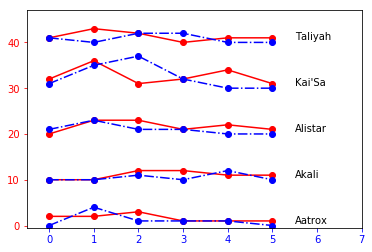

In [449]:
fig = plt.figure()
ax = plt.axes()
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
plt.xlim((-0.5,7))
plt.ylim((-0.5,47))
k = 0
for i in range(0,10,2):
    plt.plot(t1[i] + k, '-ro')
    plt.plot(t1[i+1] + k, '-.bo')
    k += 10
plt.text(5.5, 0.5, team1['Champion'][0])
plt.text(5.5, 10.5, team1['Champion'][1])
plt.text(5.5, 20.5, team1['Champion'][2])
plt.text(5.5, 30.5, team1['Champion'][3])
plt.text(5.5, 40.5, team1['Champion'][4])
plt.show()

In [450]:
#How those two teams perfomes?
teamcol2 = ['Champion', 'WLRatio1', 'WLRatio2', 'WLRatio3', 'WLRatio4', 'WLRatio5', 'WLRatio6']
team2 = lol[lol['Champion'].str.contains("Irelia|Nocturne|Galio|Xayah|Thresh")]
team2 = team2.loc[:, teamcol1]
team2 = team2.reset_index(drop=True)
team2

,Champion,WLRatio1,WLRatio2,WLRatio3,WLRatio4,WLRatio5,WLRatio6
0,Galio,0-2,2-2,2-3,1-0,2-0,1-0
1,Irelia,2-2,5-0,2-1,0-2,0-1,0-0
2,Nocturne,0-1,2-1,5-3,3-1,1-0,1-0
3,Thresh,2-1,0-2,4-2,1-3,1-0,0-1
4,Xayah,0-2,2-3,6-1,2-5,1-1,0-2


In [451]:
sett2 = ['WLRatio1', 'WLRatio2', 'WLRatio3', 'WLRatio4', 'WLRatio5', 'WLRatio6']

t2 = np.zeros((10,6))
tx2 = 0
tz2 = 0
tw2 = 0
for tx2 in range(0,10,2):
    for names in sett2:
        t2[tx2][tz2]   = int(team2[names][tw2].split('-')[0])
        t2[tx2+1][tz2] = int(team2[names][tw2].split('-')[1])
        tz2 += 1
    tz2  = 0
    tw2 += 1

t2

array([[0., 2., 2., 1., 2., 1.],
       [2., 2., 3., 0., 0., 0.],
       [2., 5., 2., 0., 0., 0.],
       [2., 0., 1., 2., 1., 0.],
       [0., 2., 5., 3., 1., 1.],
       [1., 1., 3., 1., 0., 0.],
       [2., 0., 4., 1., 1., 0.],
       [1., 2., 2., 3., 0., 1.],
       [0., 2., 6., 2., 1., 0.],
       [2., 3., 1., 5., 1., 2.]])

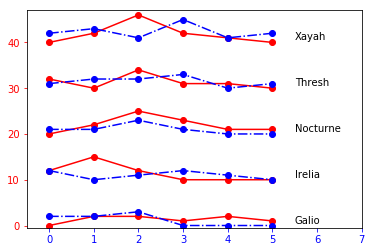

In [452]:
fig = plt.figure()
ax = plt.axes()
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
plt.xlim((-0.5,7))
plt.ylim((-0.5,47))
k = 0
for i in range(0,10,2):
    plt.plot(t2[i] + k, '-ro')
    plt.plot(t2[i+1] + k, '-.bo')
    k += 10
plt.text(5.5, 0.5, team2['Champion'][0])
plt.text(5.5, 10.5, team2['Champion'][1])
plt.text(5.5, 20.5, team2['Champion'][2])
plt.text(5.5, 30.5, team2['Champion'][3])
plt.text(5.5, 40.5, team2['Champion'][4])
plt.show()